Najpierw pobierzmy niewielki zbiór danych, punktów mających dwa atrybuty, x i y

In [3]:
%matplotlib inline
import pandas as pd

points = pd.read_csv('points.csv', header = None)

points.head()

,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613


Sprawdźmy sami, na ile klastrów powinniśmy podzielić ten zbiór, użyjmy matplotliba

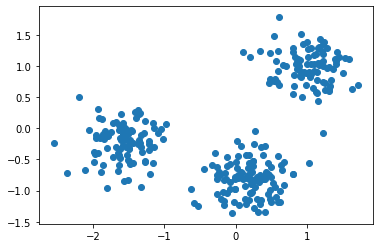

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
xs = points.loc[:,0]
ys = points.loc[:,1]
ax.scatter(xs, ys)
plt.show()

Widzimy że powinniśmy zatem podzielić zbiór na trzy klastry. Zróbmy to zatem!

In [5]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

labels = model.predict(points)

teraz zobaczymy jak to wygląda

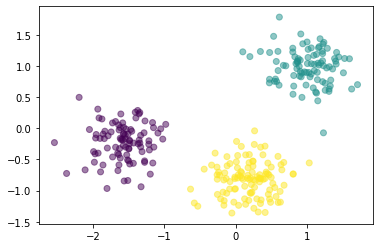

In [6]:
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.show()

Możemy również na podstawie już zrobionych klastrów dokonać predykcji labelków dla nowych punktów. Teraz natomiast poszukajmy klastrów naszych centroidów.

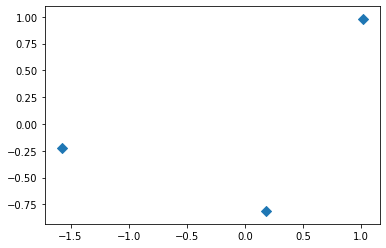

In [8]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

fig, ax = plt.subplots()

# Make a scatter plot of centroids_x and centroids_y
ax.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

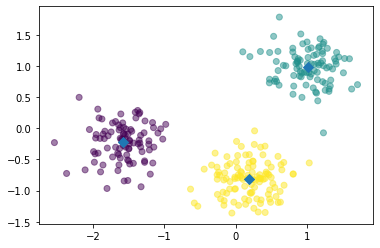

In [9]:
fig, ax = plt.subplots()
ax.scatter(xs, ys, c=labels, alpha=0.5)
ax.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

A jak ocenić, ile klastrów powinno być, jeśli nie widać tego na pierwszy rzut oka? Jeśli mamy dane z labelkami, możemy łatwo to ocenić za pomocą satndardowych miar. Jeśli jednak nie, musimy użyć innej miary. Njabardziej zależy nam na tym, żeby odległości punktów od środków klastrów były jak najmniejsze (klastry były skonsolidowane). Do tego służy wbudowana miara inertias. Pokazuje nam ona sumy odległości wszystkich punktów od ich centroidów.

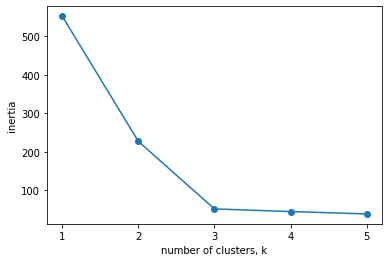

In [12]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(points)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
fig, ax = plt.subplots()
ax.plot(ks, inertias, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('inertia')
ax.set_xticks(ks)
plt.show()


Jak widać, miara jest już dość mała dla 3 klastrów. Oczywiście dalej się zmienjsza, ale zależy nam żeby klastrów nie było też za dużo. Należy tutaj znaleźć pewien złoty środek.

W przypadku, gdy mamy do czynienia ze zbiorem zalebelowanym, możemy użyć tradycyjnych miar jakości

In [13]:
!git clone https://github.com/PiotrJZielinski/ml-throwdown-datasets

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ml-throwdown-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

iris, iris_classes = load_dataset('iris', 'species')

y = iris.pop('class')
X = iris

fatal: destination path 'ml-throwdown-datasets' already exists and is not an empty directory.


In [14]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0          50   0   0
1           0   2  36
2           0  48  14


Teraz trudniejszy zbiór, niech sami zaimplementują to dla wine i pokażą tablicę crosstab, wyciągną wnioski

In [15]:
wine, wine_classes = load_dataset('wine', 'Class')

y = wine.pop('class')
X = wine
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0          13  29  20
1           0  19  50
2          46   0   1


Wyniki są, delikatnie mówiąc, kiepskie. Wynika to z faktu, że poszczególne atrybuty w zbiorze win mają bardzo różną wariancję (rozmieszczenie atrybutów). Co bardzo przeszkadza w dobrej klasteryzacji. Zobaczmy to na wykresie.

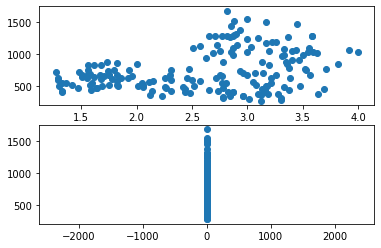

In [26]:
fig, axs = plt.subplots(2, 1)
axs[0].scatter(X['OD280/OD315 of diluted wines'], X['Proline'])
axs[1].axis("equal")
axs[1].scatter(X['OD280/OD315 of diluted wines'], X['Proline'])
plt.show()

In [27]:
for column in X:
    print(X[column].var())

0.6590623278105759
1.2480154034152224
0.07526463530756046
11.152686155018092
203.98933536469244
0.39168953532660455
0.997718672633784
0.015488633911001078
0.32759466768234624
5.374449383491404
0.052244960705897285
0.5040864089379801
99166.71735542436


Żeby to naprawić należy przeprowadzić standaryzację. Do tego służy nam gotowa bilbioteka

In [28]:
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

labels = model.fit_predict(X_scaled)

In [29]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0          59   0   3
1           0  48   3
2           0   0  65


Można również zrobić gotowy pipeline (ścieżkę, tak aby preprocesing i klasteryzacja następowały automatycznie po sobie)

In [31]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, model)
pipeline.fit(X)
labels = pipeline.predict(X)

Możemy również użyć normalizacji, która w odróżnieniu od standaryzacji, nie bierze całego rozkładu cech i nie prowadzi do zusykania wariancji 1, ale skaluje każdą próbkę z osobna, do wartości [0,1]

Experiment with multiple scaling methods can dramatically increase your score on classification tasks, even when you hyperparameters are tuned. So, you should consider the scaling method as an important hyperparameter of your model.
Scaling methods affect differently on different classifiers. Distance-based classifiers like SVM, KNN, and MLP(neural network) dramatically benefit from scaling. But even trees (CART, RF), that are agnostic to some of the scaling methods, can benefit from other methods.

In [32]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
pipeline = make_pipeline(normalizer, model)
pipeline.fit(X)
labels = pipeline.predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0          51   4   5
1           8  40  33
2           0   4  33


Przejdźmy teraz do klasteryzacji hierarchicznej. Do tego celu użyjemy zbioru Eurowizji 2016, w którym za wiersze służą kraje, a za kolumny ilości punktów, które przyznały psozczególnym piosenkom. Pobierzmy go ze zbioru.

In [33]:
eurovision = pd.read_csv('eurovision-2016.csv')
eurovision = eurovision.pivot(index='From country', columns='To country')['Jury Rank']
eurovision = eurovision.fillna(0)
eurovision.index

Index(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova',
       'Montenegro', 'Norway', 'Poland', 'Russia', 'San Marino', 'Serbia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands',
       'Ukraine', 'United Kingdom'],
      dtype='object', name='From country')

W bibliotece scikit, metoda linkage odpowiada za klasteryzację hierarchiczną, natomiast metoda dendrogram pozwala wizualizować wynik jej pracy. Linkage 'complete' oznacza, że dystans pomiędzy klastrami będzie mierzony jako dystans pomiędzy najbardziej oddalonymi od siebie próbkami w obu klastrach

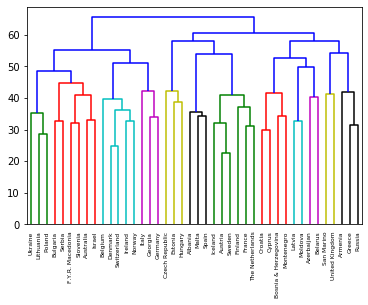

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(eurovision, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=eurovision.index,
           leaf_rotation=90,
           leaf_font_size=6,
            )
plt.show()

Wysokość dendrogramu pozwala określić stopień zbliżenia poszczególnych punktów (im niżej łączenie, tym bliżej siebie elementy). Można jeszcze zrobić typ 'single', wtedy odległość między klastrami mierzona za pomocą odległości najbliżej siebie położonych punktów obu klastrów

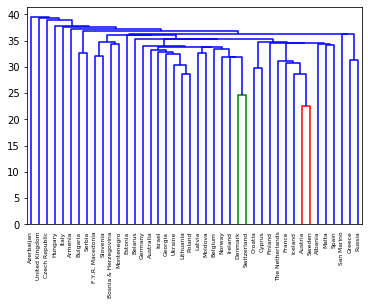

In [68]:
mergings = linkage(eurovision, method='single')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=eurovision.index,
           leaf_rotation=90,
           leaf_font_size=6,
            )
plt.show()

Jak widać, wszystko jest na znacznie niższym poziomie. Tutaj również możemy bawić się normalizacją próbek (na przykład dać takie zadanie)

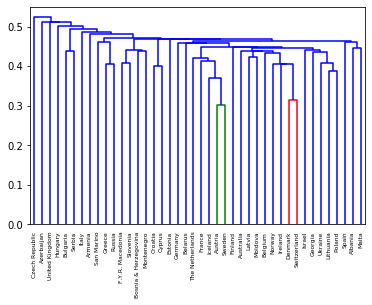

In [35]:
from sklearn.preprocessing import normalize
normalized_eurovision = normalize(eurovision)
mergings = linkage(normalized_eurovision, method='single')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=eurovision.index,
           leaf_rotation=90,
           leaf_font_size=6,
            )
plt.show()

Możemy zobaczyć lebelki klastrów na określonej wysokości za pomocą funkcji fcluster

In [36]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 60, criterion='distance')
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


Inna metoda do wizualizacji i klasteryzacji danych - tSNE - t-distibuted stochastic neighbour embedding. mapuje na przestrzeń 2 lub 3 wymiarową. Świetna do odkrywania zbiorów. Przykładowo iris ma 4 atrybuty, ale możemy je przerzucić na 2. metoda tSNE ma learning rate. Za każdym uruchomieniem daje inny wykres xd.

If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.

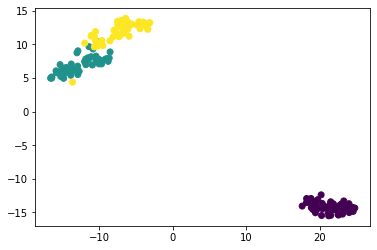

In [37]:
from sklearn.manifold import TSNE

iris, iris_classes = load_dataset('iris', 'species')

y = iris.pop('class')
X = iris

# Create a TSNE instance: model
model = TSNE(learning_rate=300)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=y)
plt.show()

# Redukcja wymiarowości

Przypomnienie po co redukować:
    -bardziej efektywne obliczeniowo
    -mniej miejsca na storage
    -eliminujemy szumy i niepotrzebne informacje
    -mniejszy problem przy klasyfikacji, regresji itd.

PCA -principal component analysis, algorytm służący do redukcji wymiarowości.

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

Generalnie w pierwszym kroku algorytm dąży do redukcji korelacji między danymi, żeby były bardziej niezależne od siebie, bo wtedy więcej można wyciągnąć z argumentów. Sprawdźmy korelację dla zbioru win.

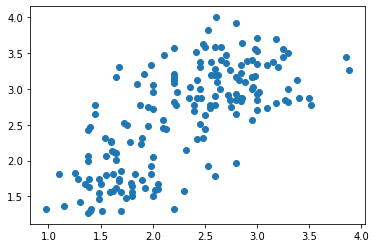

0.6999493647911862


In [39]:
from scipy.stats import pearsonr

wine, wine_classes = load_dataset('wine', 'Class')

y = wine.pop('class')
X = wine

xs = wine['Total phenols']
ys = wine['OD280/OD315 of diluted wines']

fig, ax = plt.subplots()
ax.scatter(xs, ys)
plt.show()

correlation, pvalue = pearsonr(xs, ys)
print(correlation)

Teraz dokonamy dekoreralizacji

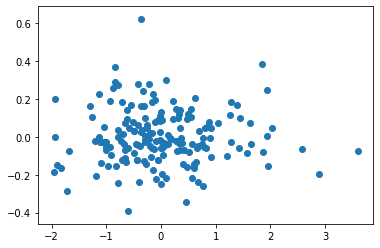

-1.0408340855860843e-17


In [40]:
from sklearn.decomposition import PCA
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(wine)

# Assign 5th column of pca_features: xs
xs = pca_features[:,5]

# Assign 11th column of pca_features: ys
ys = pca_features[:,11]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.show()


# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

Po dekoreraryzacji możemy zająć się już redukcją wymiarów (metoda stratna już). Musimy znaleźć ile minimalnie parametrów potrzebuje dataset żeby być poprawnie rozpoznawanym. Algorytm PCA szuka takich cech, które mają wysoką wariancję. W tym również będzie nam pomocna biblioteka PCA.

Text(0, 0.5, 'variance')

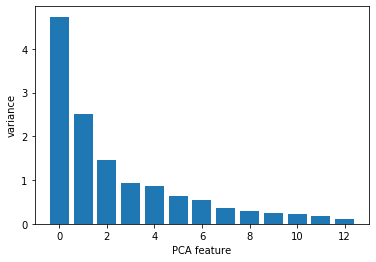

In [41]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(wine)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')

Przejdźmy finalnie do redukcji wymiarowości. W tym celu przy definiowaniu modelu PCA musimy określić ilość komponentów jakie chcemy uzwględnić.

In [42]:
scaler = StandardScaler()
scaler.fit(wine)
scaled_wine = scaler.transform(wine)

pca = PCA(n_components=3)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_wine)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_wine)

# Print the shape of pca_features
print(pca_features.shape)

(178, 3)


Teraz możemy obejrzeć nasze 3 wymiary na wykresie

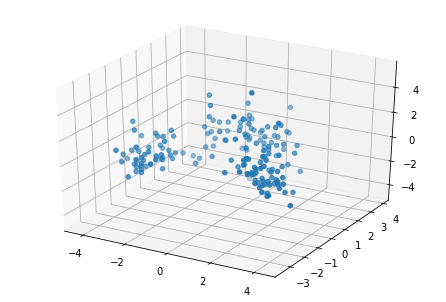

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2])
plt.show()

Generalnie redukcja wymiarów sprawdza się przy długich zbiorach, takich jak zbiór słów występujących w różnych tekstach. Ale wydaje mi się że nie ma sensu już tutaj tego robić. Średnio będzie czas chyba.